In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


In [89]:
df=pd.read_csv("economic_index.csv")
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [90]:
##drop unneccessary columns
df.drop(columns=["Unnamed: 0","year","month"],axis=1,inplace=True)
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [91]:
##check null values
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

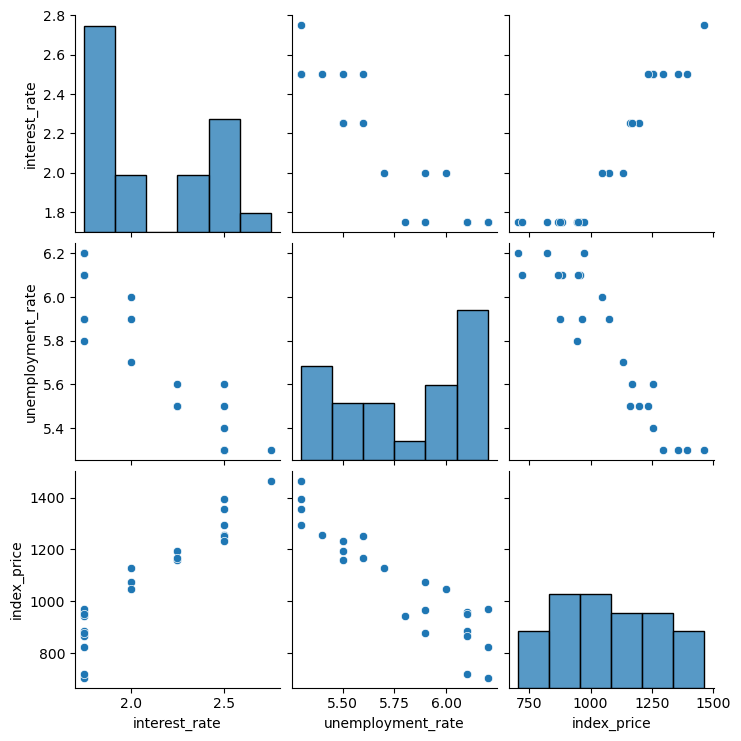

In [92]:
#lets do some visualization
import seaborn as sns
sns.pairplot(df)
plt.show()

In [93]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


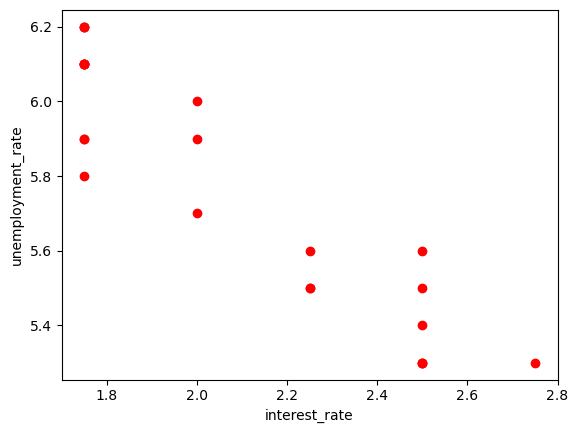

In [94]:
#visualize the data point more closely
plt.scatter(df['interest_rate'],df['unemployment_rate'],color='r')
plt.xlabel("interest_rate")
plt.ylabel("unemployment_rate")
plt.show()

In [95]:
#indepent and dependent
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [96]:
##train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25, random_state=42)

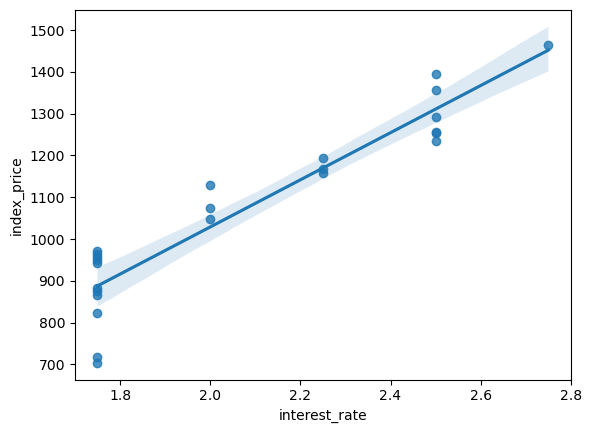

In [97]:
import seaborn as sns
sns.regplot(x=df['interest_rate'],y=df['index_price'])
plt.show()

In [98]:
##standarazation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train=scaler.fit_transform(x_train)
x_train
x_test = scaler.transform(x_test)
x_test

array([[ 0.57346234, -0.8615569 ],
       [-0.90115511,  1.30956648],
       [ 2.0480798 , -1.48187786],
       [-0.90115511,  0.999406  ],
       [-0.16384638,  0.37908503],
       [ 0.57346234, -0.55139641]])

In [99]:
##apply multi linear regression
##apply simple linear regression
from sklearn.linear_model import LinearRegression
regression=LinearRegression(n_jobs=-1)
regression.fit(x_train,y_train)
print(regression.coef_)
print(regression.intercept_)

[  88.27275507 -116.25716066]
1053.4444444444443


In [100]:
##cross valation
from sklearn.model_selection import cross_val_score

In [101]:
validation_score=cross_val_score(regression,x_train,y_train,scoring='neg_mean_squared_error',cv=3)

In [102]:
np.mean(validation_score)

-5914.828180162388

In [103]:
##predication
y_pred=regression.predict(x_test)

In [104]:
##performance matrix
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

5793.762887712579
59.935781523235526
76.11677139574812


In [105]:
##r square
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)

0.8278978091457142


In [106]:
## R adjusted r2
1 -  ( (1-score)*(len(y_test-1))/(len(y_test)-x_test.shape[1]-1))

0.6557956182914284

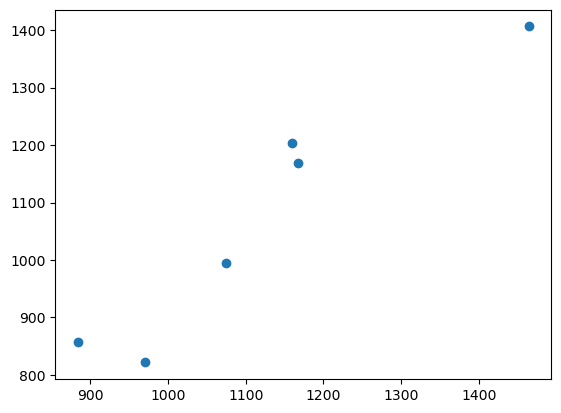

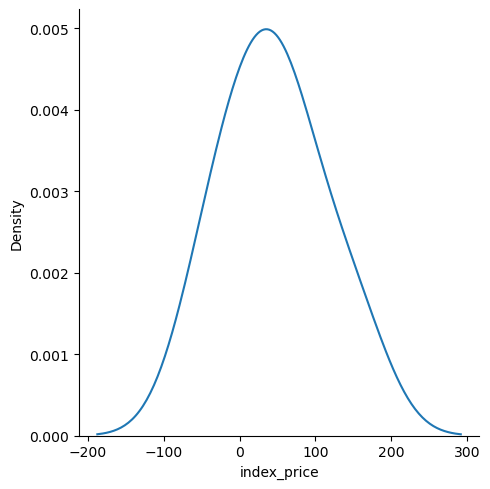

In [107]:
##assumption
plt.scatter(y_test,y_pred)
residuals=y_test - y_pred
sns.displot(residuals,kind='kde')
plt.show()

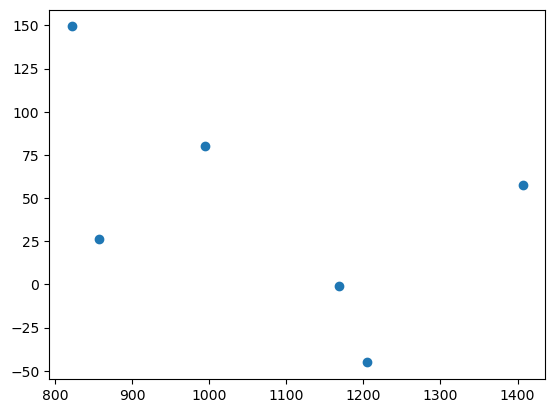

In [108]:
plt.scatter(y_pred,residuals)
plt.show()

In [109]:
##ols linear regression
import statsmodels.api as sm
model= sm.OLS(y_train,x_train).fit()

prediction = model.predict(x_test)
print(prediction)
print(model.summary())

[ 150.78325954 -231.79392541  353.06855924 -195.73554836  -58.53452146
  114.72488249]
                                 OLS Regression Results                                
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Sat, 05 Jul 2025   Prob (F-statistic):                       0.754
Time:                        11:46:17   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err 

C:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  res = hypotest_fun_out(*samples, **kwds)


In [114]:
new_data = pd.DataFrame({'interest_rate':[3.4],'unemployment_rate':[3.0]})
new_data

,interest_rate,unemployment_rate
0,3.4,3.0


In [115]:
pred_index=regression.predict(new_data)

pred_index

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([1004.8003297])

In [112]:
pred_index[0]

1142.3743895926204

In [113]:
print(f"the index price of new data :{pred_index[0]: .2f}")

the index price of new data : 1142.37
